<a href="https://colab.research.google.com/github/andrebelem/pythonverse/blob/main/PyGMT_on_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=http://observatoriooceanografico.org/wp-content/uploads/elementor/thumbs/logo-o2-2-p31vla9ib17i85olifd4l1xk0e5lktrkal6u0s4c6o.png width=50></img><br> 
# Installing GMT6 "fresh" and using PyGMT on colab<br>

Author: [A.L. Belem](mailto:andrebelem@id.uff.br) @ [Oceanographic Observatory](http://www.observatoiriooceanografico.uff.br) 2021 (version 1) made for students in the **Climate Change and its Impacts** class (and for those more interested in) using [PyGMT](https://www.pygmt.org/latest/) to produce their figures. The challenge here was to use the new [GMT6](https://www.generic-mapping-tools.org/) with PyGMT in the COLAB environment (without having to install python locally).<br>

The lines below can work separately or together. The suggestion is that you keep running each line and studying both its content and the result. Copy to your Google Drive and modify as necessary (in addition to including your own annotations).<br>

This Notebook is designed to be used in **Google Colab**, but it also fits the Jupyter Notebook or Jupyter Lab. Just skip the installation part and go straight to the pygmt code if you have already installed everything on your desktop.
<br>
<hr>

**History:**<br>
June, 12 2021. (version 1 out)
<br>
<br>

In [36]:
# because I like to enjoy my coffee in silence (3 runs averaged 8 minutes to install everything ! keep drinking your coffee)
%%capture
!sudo apt update 
!sudo apt upgrade -y
!sudo apt install -y build-essential cmake libcurl4-gnutls-dev libnetcdf-dev gdal-bin libgdal-dev libfftw3-dev libpcre3-dev liblapack-dev libblas-dev libglib2.0-dev ghostscript ghostscript-x graphicsmagick ffmpeg xdg-utils
# clone gmt from source
!git clone --depth 50 https://github.com/GenericMappingTools/gmt
# cmake everything
!cmake /content/gmt
# build and install
!cmake --build . --target install

In [37]:
# just for the paranoics (answer should be )/usr/local/bin/gmt
!which gmt

/usr/local/bin/gmt


In [38]:
# install pygmt with pip
%%capture
!pip install pygmt

From this point forward it is pure `pygmt`.

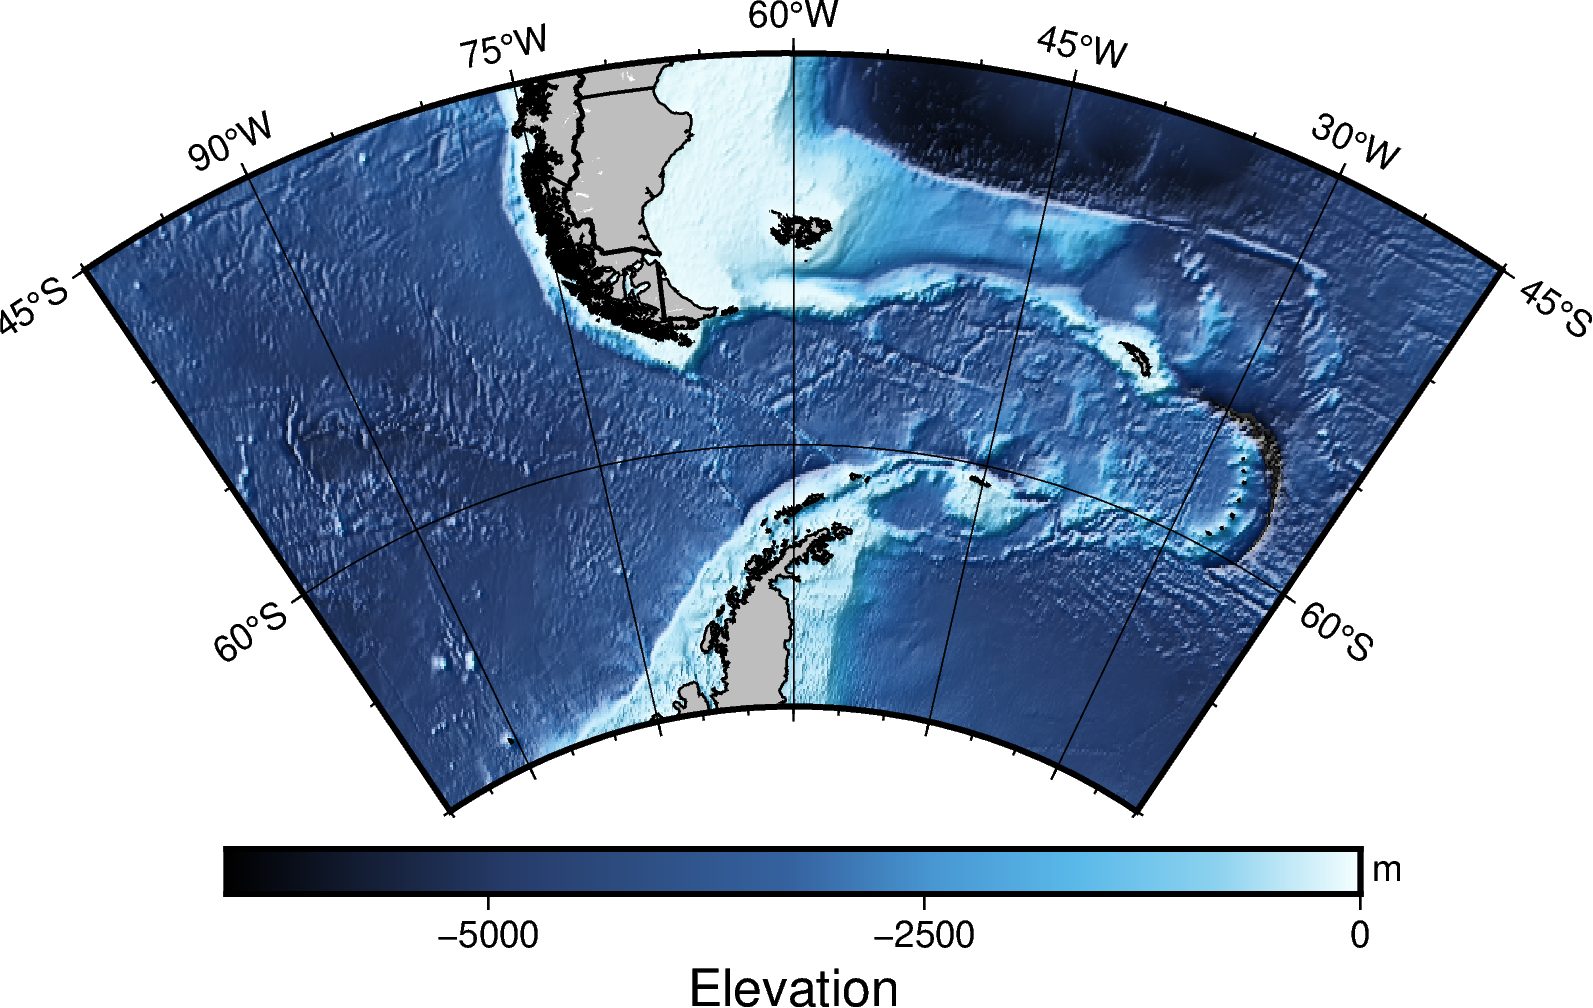

In [39]:
# make your magic and enjoy
import pygmt

grid = pygmt.datasets.load_earth_relief(
    "05m", region=[-100, -20, -70, -45], registration="gridline"
)
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(FORMAT_GEO_MAP="DF")

mycmap = pygmt.makecpt(cmap="geo", series=[-6500, 0, 10])

fig.grdimage(grid=grid,
    cmap=mycmap,
    region=[-100, -20, -70, -45],
    projection="L-60/-60/-70/-45/12c",
    shading='+a-45+nt1'
    )
fig.coast(
    shorelines="1/0.5p",
    region=[-100, -20, -70, -45],
    projection="L-60/-60/-70/-45/12c",
    land="gray",
    borders=["1/thick,black", "2/thin,black"],
    frame=['a15f5g15','WNsE']
)
fig.colorbar(frame=["a2500", "x+lElevation", "y+lm"])

fig.show()

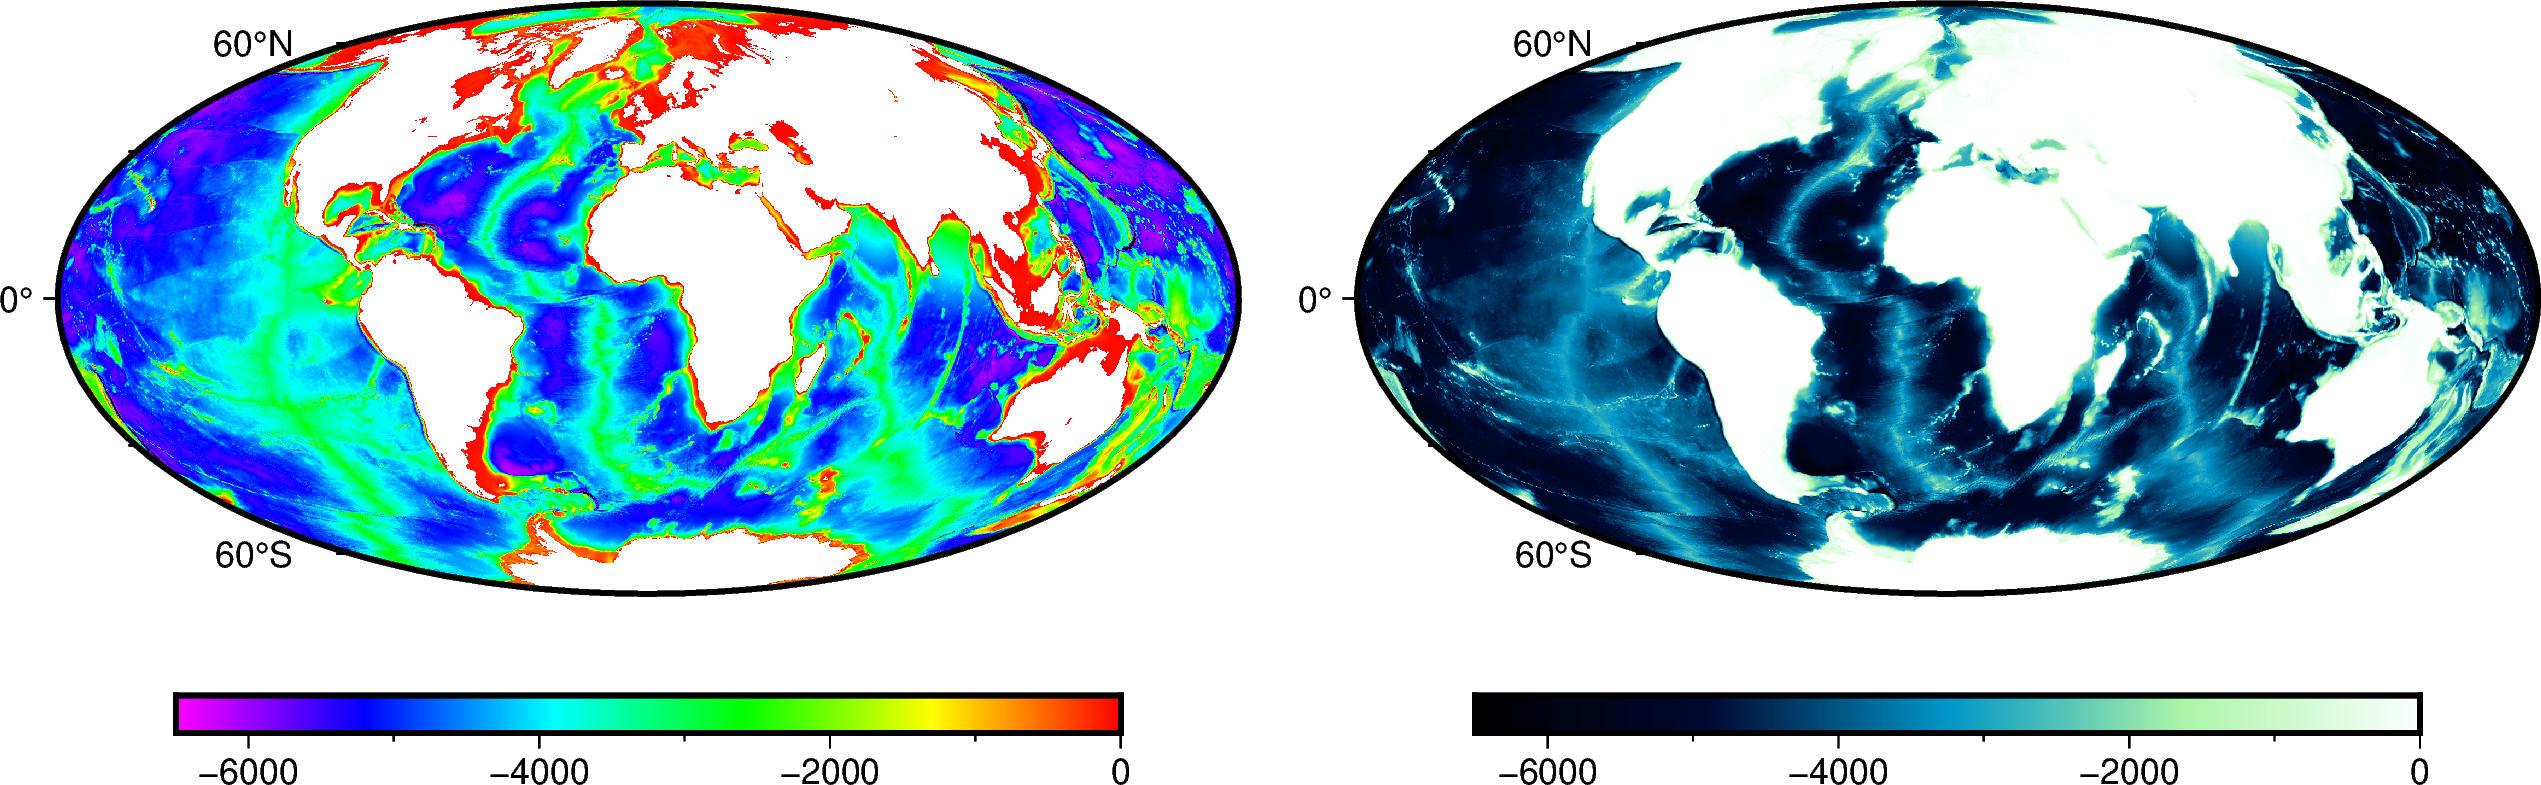

In [47]:
# another very good example, using two colormaps. Note the shifting of the second figure
import pygmt

fig = pygmt.Figure()
pygmt.makecpt(cmap="rainbow",series=[-6500, 0, 10])
fig.grdimage("@earth_relief_10m", projection="H10c", frame=True)
fig.colorbar(frame=True)

fig.shift_origin(xshift="11c")

pygmt.makecpt(cmap="ocean",series=[-6500, 0, 10])
fig.grdimage("@earth_relief_10m", projection="H10c", frame=True)
fig.colorbar(frame=True)
fig.show()

#### Enjoy your python.